### Breast Cancer Prediction

<h3>Description</h3>

<p>Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].</p>

<p>This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/</p>

<h4>Atrribute Information</h4>

<ul>
    <li>ID number</li>
    <li>Diagnosis (M = Malignant, B = Benign)</li>
</ul>

<p>Ten real-valued features are computed for each cell nucleus</p>:

<p>
a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant
</p>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
def load_data(file, columns=None):
    try:
        data = pd.read_csv(file)
    except Exception as e:
        print(e)
    return data

In [3]:
df = load_data('data.csv')

In [4]:
# Displaying the first five rows of the table
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Drop the id of the table as it is not relevant to the dataset
df.drop('id', axis=1, inplace=True)

In [6]:
# Summarize the data
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
# Checking for null values
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [9]:
# Features of the dataset
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
# Size of the data 
df.shape

(569, 32)

In [11]:
diag = {'M': 'Malignant', 'B': 'Benign'}
df['diagnosis'] = df['diagnosis'].map(diag)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
# Determining the patients with malignant or benign breast cancer
diagnosis = df['diagnosis'].value_counts()
diagnosis

Benign       357
Malignant    212
Name: diagnosis, dtype: int64

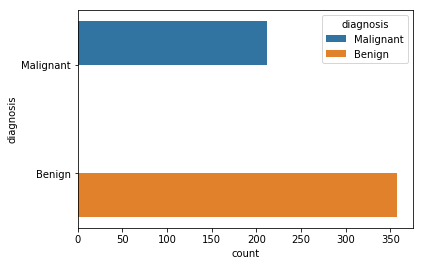

In [13]:
# Graph Plot
sns.countplot(y = df['diagnosis'], hue='diagnosis', data=df)

In [14]:
df.drop('Unnamed: 32', axis=1, inplace=True)

In [15]:
df_x = df.copy()
df_x.drop('diagnosis', axis=1, inplace=True)
df_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# Normalize the features to prevent overfitting
def Normalization(X, mean, std):
    return (X - mean) / std

df_x = Normalization(df_x, np.mean(df_x), np.std(df_x))

In [17]:
df_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [18]:
df_x['diagnosis'] = df['diagnosis']

In [19]:
df = df_x
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,Malignant
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,Malignant
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,Malignant
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,Malignant
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,Malignant


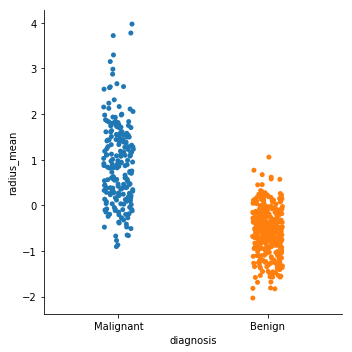

In [20]:
# How does the radius affect the diagnosis
sns.catplot(x='diagnosis', y='radius_mean', data=df)

We can see from the plot above that most of benign tends to have mean of distances from center to points on the perimeter lower compared to malignant

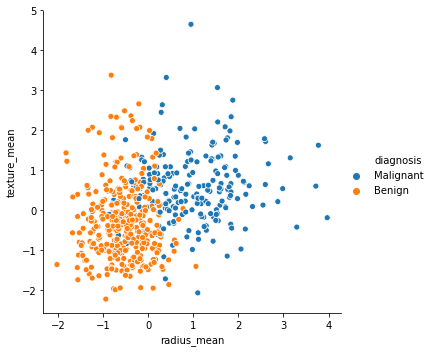

In [21]:
sns.relplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)

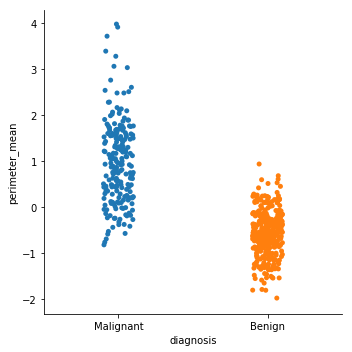

In [22]:
sns.catplot(x='diagnosis', y='perimeter_mean', data=df)

Malignant tends to have higher perimeter mean size of the core tumor compared to Benign

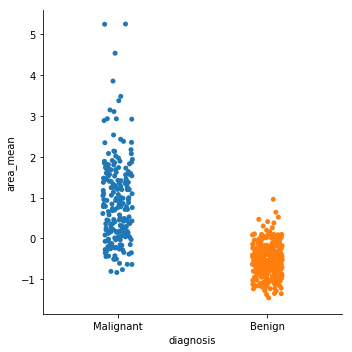

In [23]:
sns.catplot(x='diagnosis', y='area_mean', data=df)

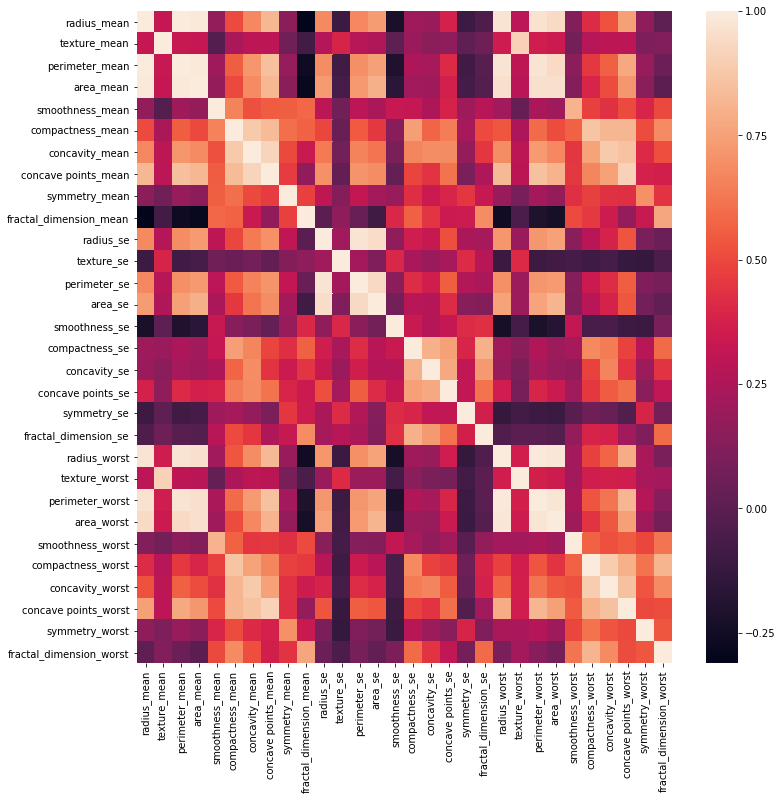

In [24]:
# Heat Map plot 
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr())

In [25]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,Malignant
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,Malignant
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,Malignant
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,Malignant
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,Malignant


In [26]:
# Plotting all the features against the target
X = df.copy()
X.drop('diagnosis', axis=1, inplace=True)
def plotFeatures():
    columns = X.columns.values
    for i in np.arange(len(columns)):
        sns.catplot(x = 'diagnosis', y = columns[i], data = df)

/home/toptechai/Documents/data-science/venv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


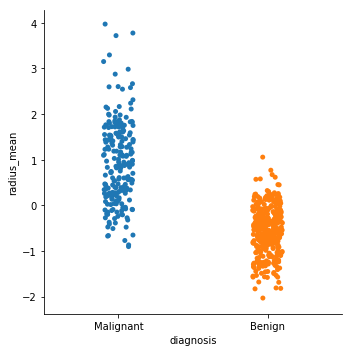

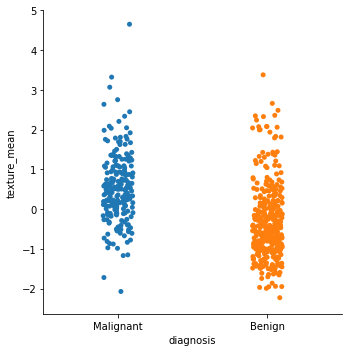

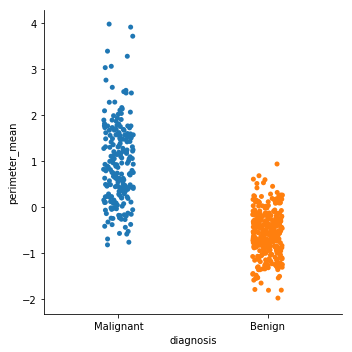

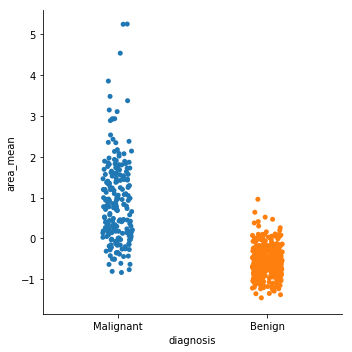

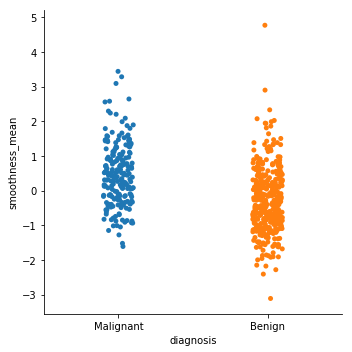

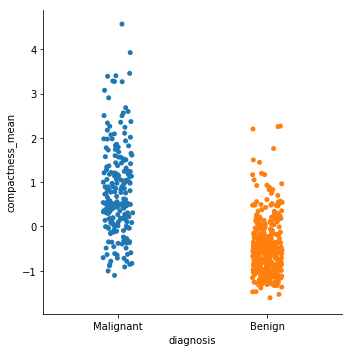

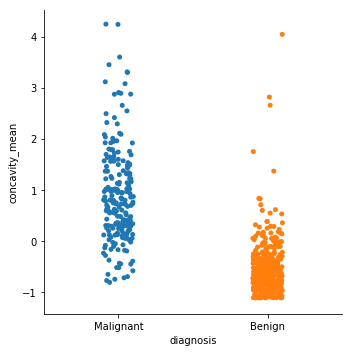

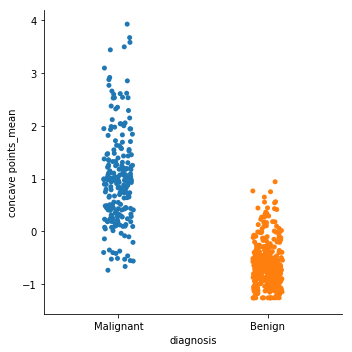

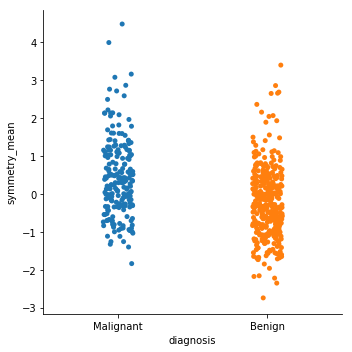

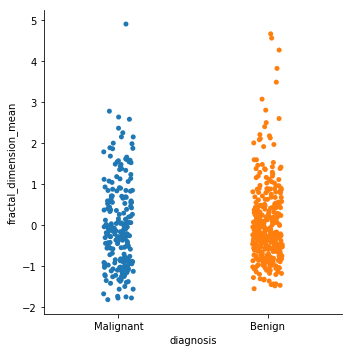

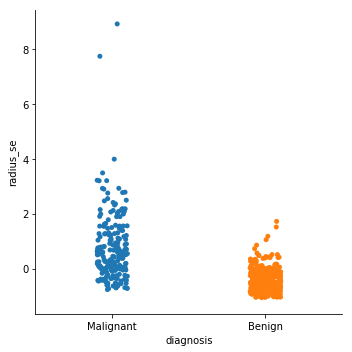

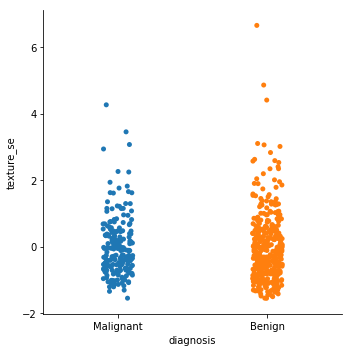

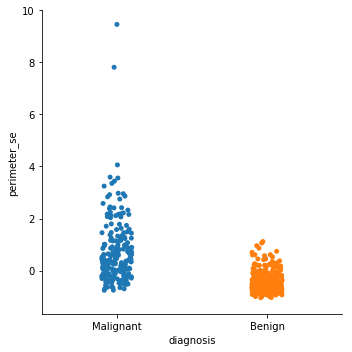

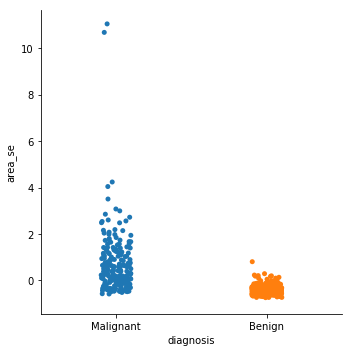

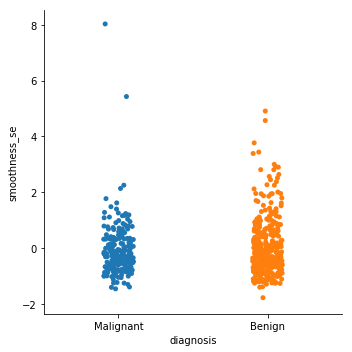

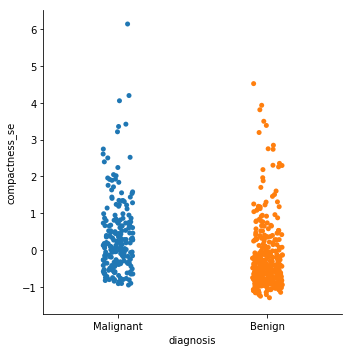

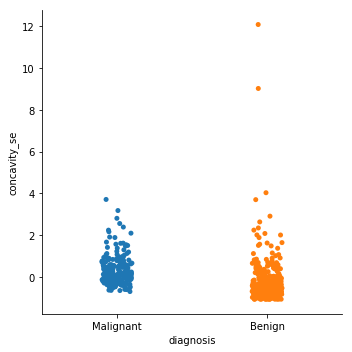

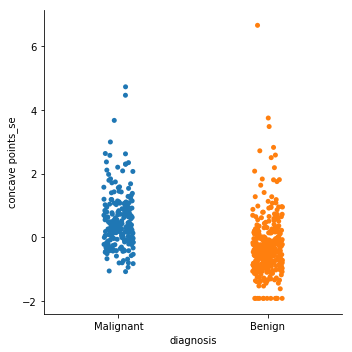

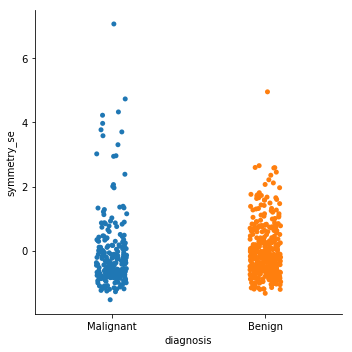

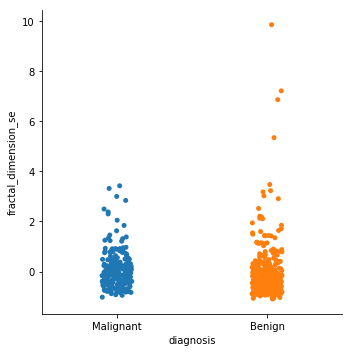

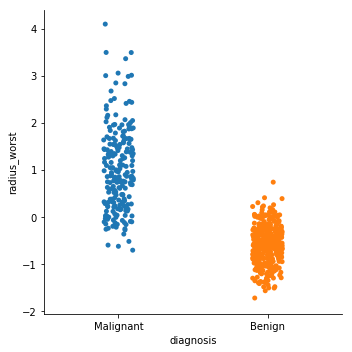

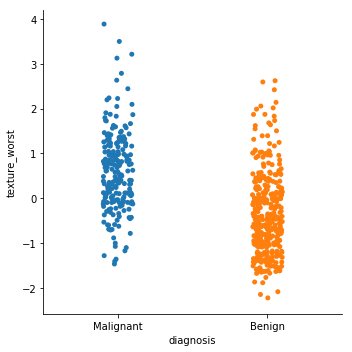

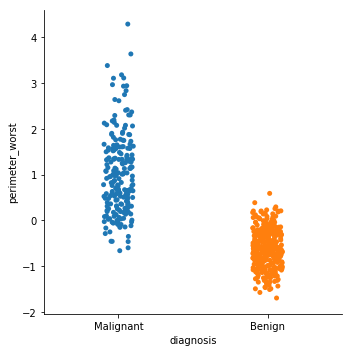

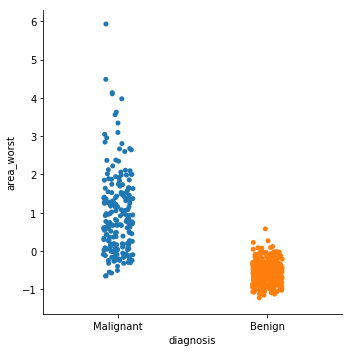

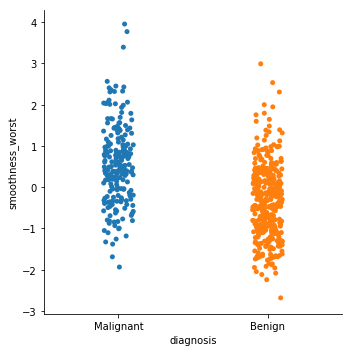

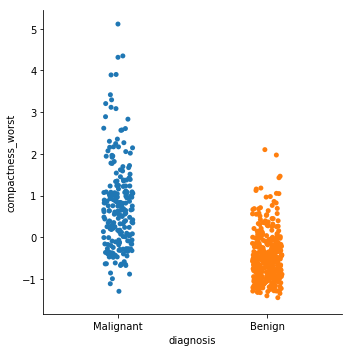

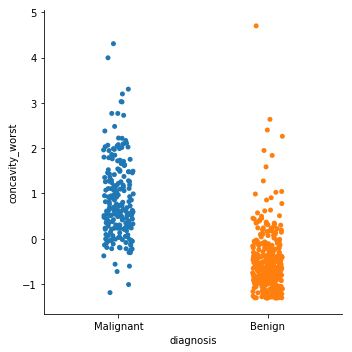

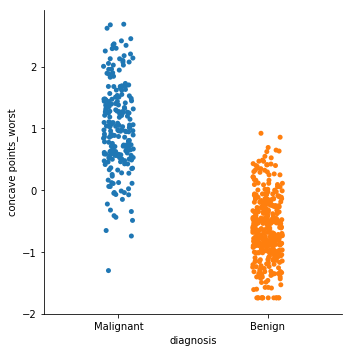

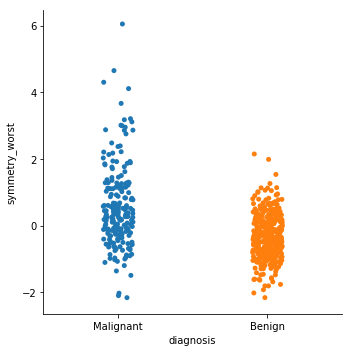

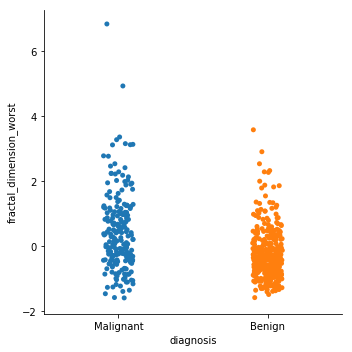

In [27]:
plotFeatures()

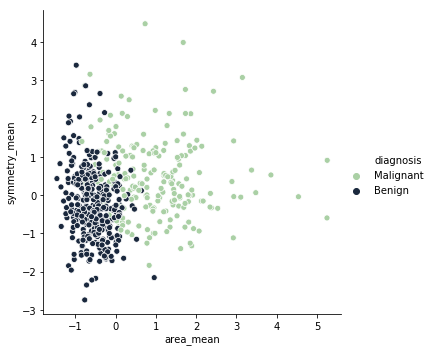

In [28]:
sns.relplot(x="area_mean", y="symmetry_mean", hue="diagnosis", palette="ch:r=-.5,l=.75", data=df)

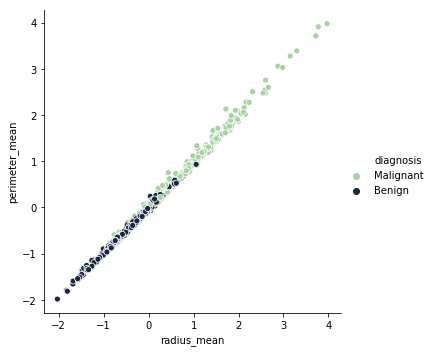

In [29]:
# Plot of the radius mean against the perimeter mean 
sns.relplot(x="radius_mean", y="perimeter_mean", hue="diagnosis", palette="ch:r=-.5,l=.75", data=df)

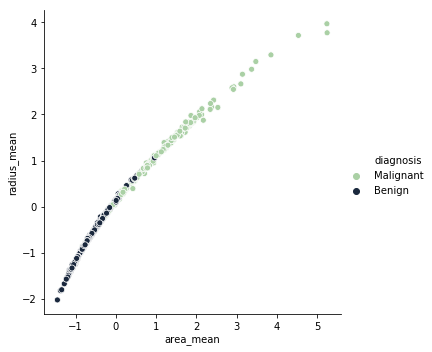

In [30]:
sns.relplot(x="area_mean", y="radius_mean", hue="diagnosis", palette="ch:r=-.5,l=.75", data=df)

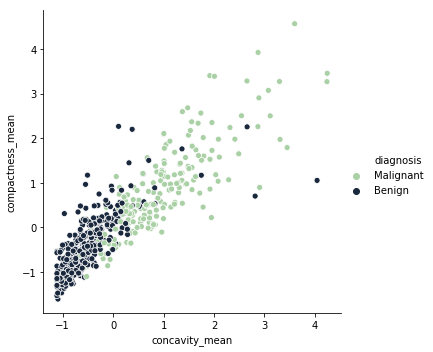

In [31]:
sns.relplot(x="concavity_mean", y="compactness_mean", hue="diagnosis", palette="ch:r=-.5,l=.75", data=df)

In [32]:
df.diagnosis.unique()

array(['Malignant', 'Benign'], dtype=object)

In [33]:
diag = {'Malignant': 1, 'Benign': 0}
df['diagnosis'] = df['diagnosis'].map(diag)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [34]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


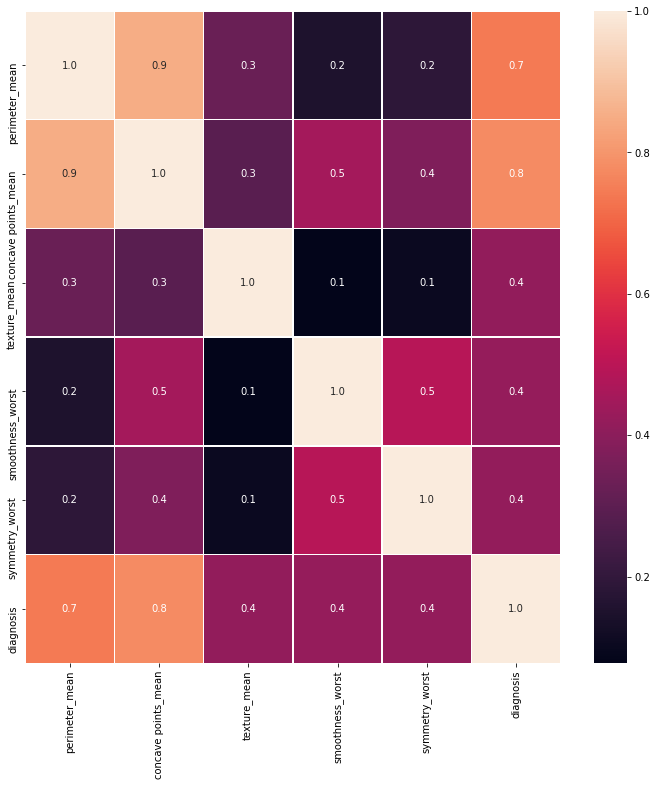

In [35]:
df_tumor = df.copy()
df_tumor = df[['perimeter_mean', 'concave points_mean', 'texture_mean', 'smoothness_worst', 
               'symmetry_worst', 'diagnosis']]
# Heat Map plot 
plt.figure(figsize=(12, 12))
sns.heatmap(df_tumor.corr(), annot=True, linewidths=.5, fmt= '.1f')


In [36]:
# Manually picking features 
# We can see that the radius_mean, perimeter_mean and area mean are highly correlated and the 
# perimeter mean has the strongest correlation with the diagnosis so we can go with that
# Also compactness_mean, concavity_mean and concave points_mean all have very strong correlation
X = df[['perimeter_mean', 'concave points_mean', 'texture_mean', 'smoothness_worst', 'symmetry_worst']]
y = df.diagnosis

In [37]:
X.shape, y.shape

((569, 5), (569,))

### Training the Models

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 5), (171, 5), (398,), (171,))

In [39]:
# Using Logisic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
def CustomTrainingModels(model, train_x, train_y, test_x, test_y):
    m = model
    m = m.fit(train_x, train_y)
    predictions = m.predict(test_x)
    score = m.score(test_x, test_y)
    cm = metrics.confusion_matrix(test_y, predictions)
    return score, cm, m

def plotConfusionMap(score, cm):
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    title = 'Accuracy score: {0}'.format(score)
    plt.title(title, size=12)

In [40]:
score, cm, lr_pickle = CustomTrainingModels(LogisticRegression(solver='liblinear'), X_train, y_train, X_test, y_test)
lr_pickle

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
# Logistic Regression
models = {'Logistic Regression': LogisticRegression(solver='liblinear'), 
          'Support Vector Classifier' : svm.SVC(kernel='linear'), 
          'Decision Tree Classifier': DecisionTreeClassifier(), 
            'KNN': knn(n_neighbors=6), 
          'Random Forest Classifier': RandomForestClassifier(n_estimators = 10, 
                                                             criterion = 'entropy', random_state = 0),
         'MLP Classifier' : MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4,3), random_state=1)}
def PrintModelResults(train_x, train_y, test_x, test_y):
    for k, model in models.items():
        score, cm, m = CustomTrainingModels(model, train_x, train_y, test_x, test_y)
        plotConfusionMap(score, cm)
        print(f"{k}: {score}\n {cm}\n")

Logistic Regression: 0.9707602339181286
 [[107   1]
 [  4  59]]

Support Vector Classifier: 0.9590643274853801
 [[106   2]
 [  5  58]]

Decision Tree Classifier: 0.9064327485380117
 [[102   6]
 [ 10  53]]

KNN: 0.9532163742690059
 [[106   2]
 [  6  57]]

Random Forest Classifier: 0.9181286549707602
 [[103   5]
 [  9  54]]

MLP Classifier: 0.9473684210526315
 [[107   1]
 [  8  55]]



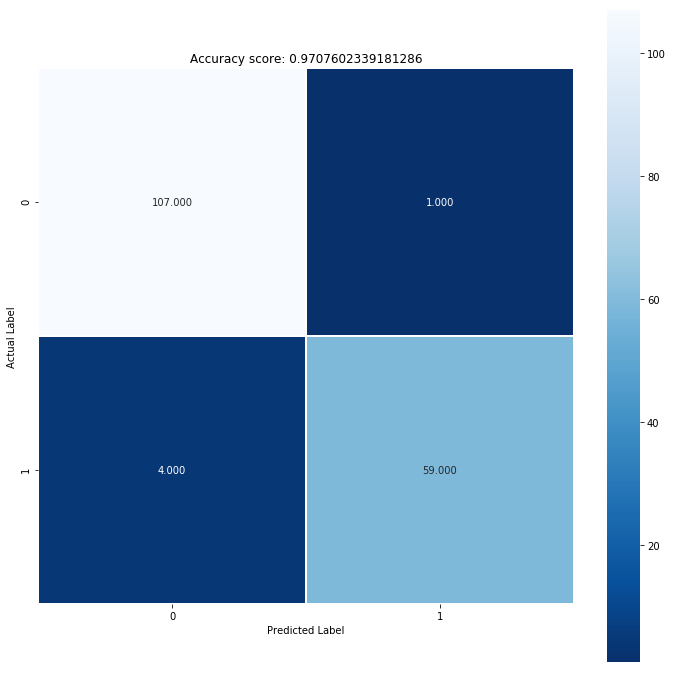

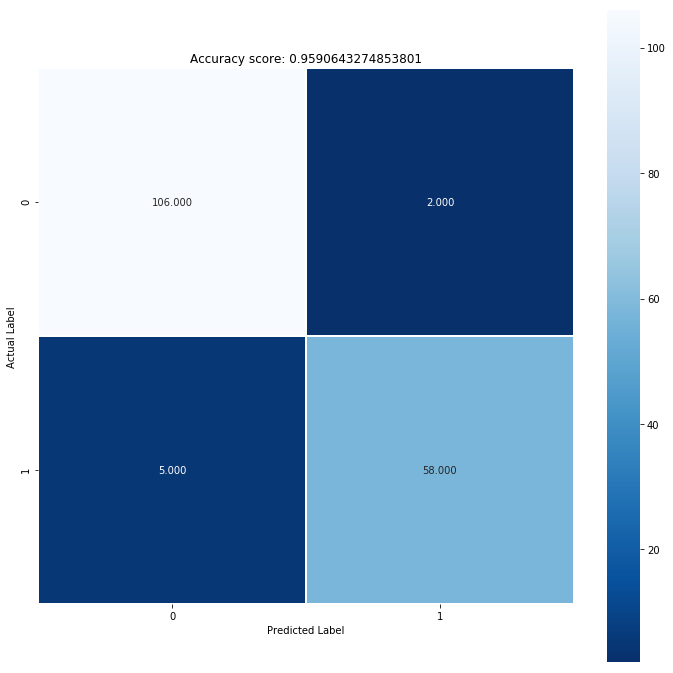

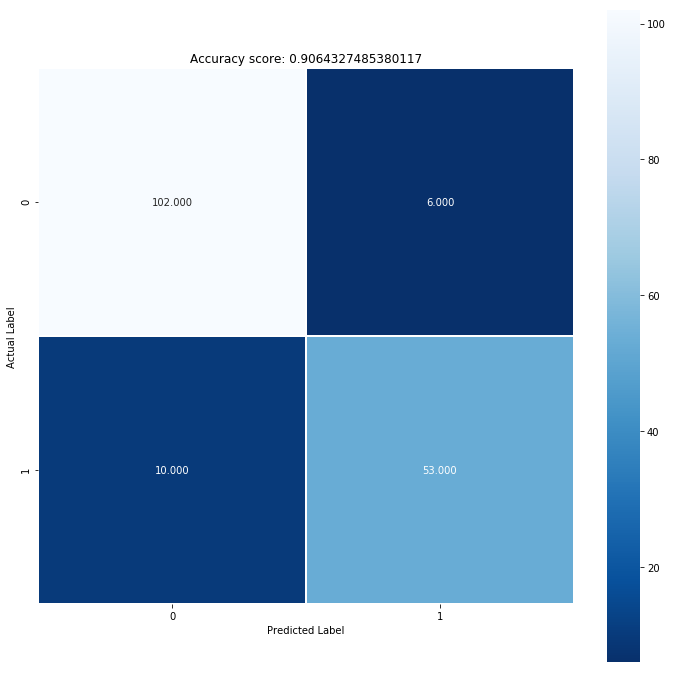

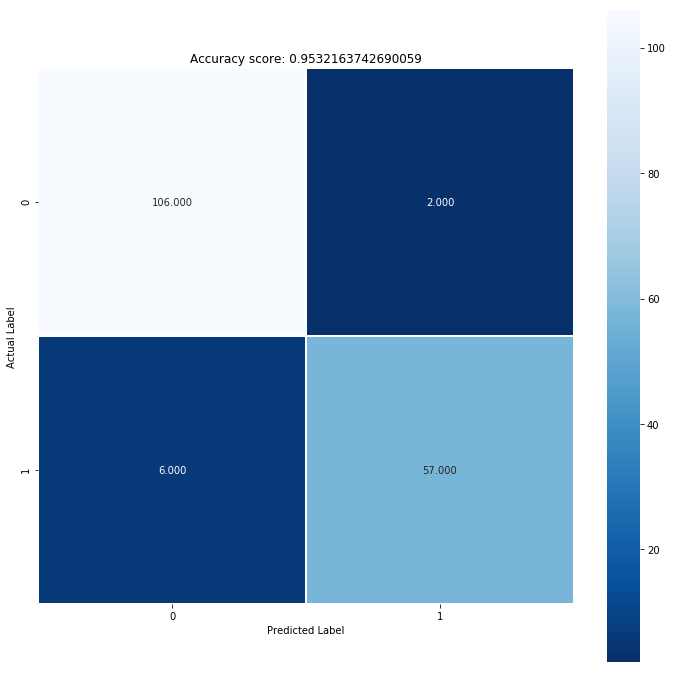

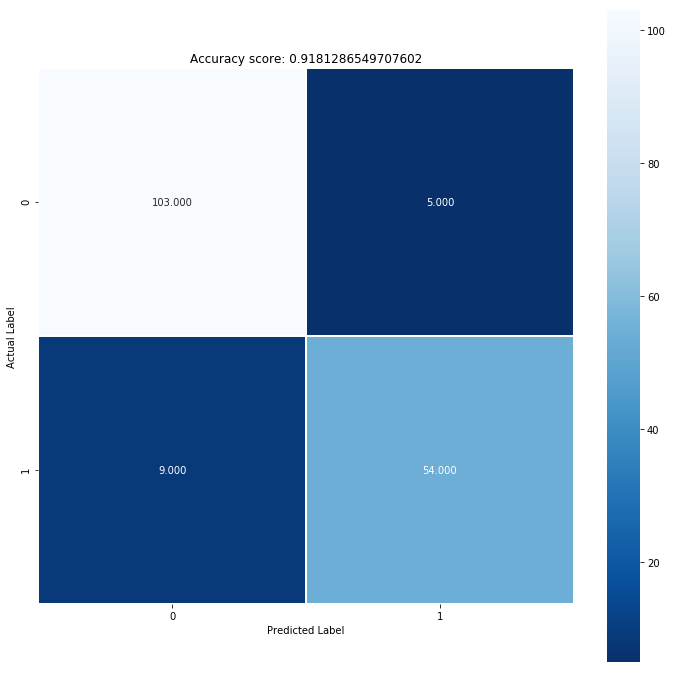

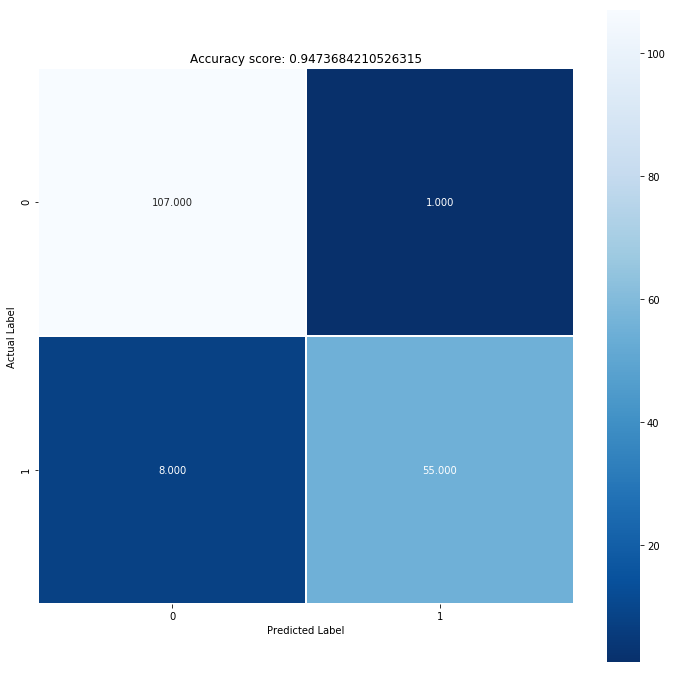

In [42]:
PrintModelResults(X_train, y_train, X_test, y_test)

### Selecting Features using ScikitLearn Feature Selectors

In [43]:
# Using feature selector algorithms
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [44]:
X_fs = df.iloc[:, :30]
y_fs = df['diagnosis']

In [45]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_fs, y_fs)
model = SelectFromModel(lsvc, prefit=True)
X_fs = model.transform(X_fs)
X_fs.shape

(569, 7)

In [46]:
X_fs

array([[ 2.53247522,  2.48973393,  1.88668963, ...,  1.30768627,
         2.29607613,  2.75062224],
       [ 0.54814416,  0.4992546 ,  1.80592744, ..., -0.37561196,
         1.0870843 , -0.24388967],
       [ 2.03723076,  1.22867595,  1.51187025, ...,  0.52740741,
         1.95500035,  1.152255  ],
       ...,
       [ 0.10577736,  0.18489241,  0.56136143, ..., -0.80958728,
         0.41406869, -1.10454895],
       [ 2.65886573,  1.15793543,  1.96123934, ...,  1.43042677,
         2.28998549,  1.91908301],
       [-1.26181958, -0.07027874, -1.41089258, ..., -1.85901852,
        -1.74506282, -0.04813821]])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y_fs, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 7), (171, 7), (398,), (171,))

Logistic Regression: 0.9707602339181286
 [[107   1]
 [  4  59]]

Support Vector Classifier: 0.9649122807017544
 [[107   1]
 [  5  58]]

Decision Tree Classifier: 0.9590643274853801
 [[105   3]
 [  4  59]]

KNN: 0.9590643274853801
 [[107   1]
 [  6  57]]

Random Forest Classifier: 0.935672514619883
 [[103   5]
 [  6  57]]

MLP Classifier: 0.9532163742690059
 [[104   4]
 [  4  59]]



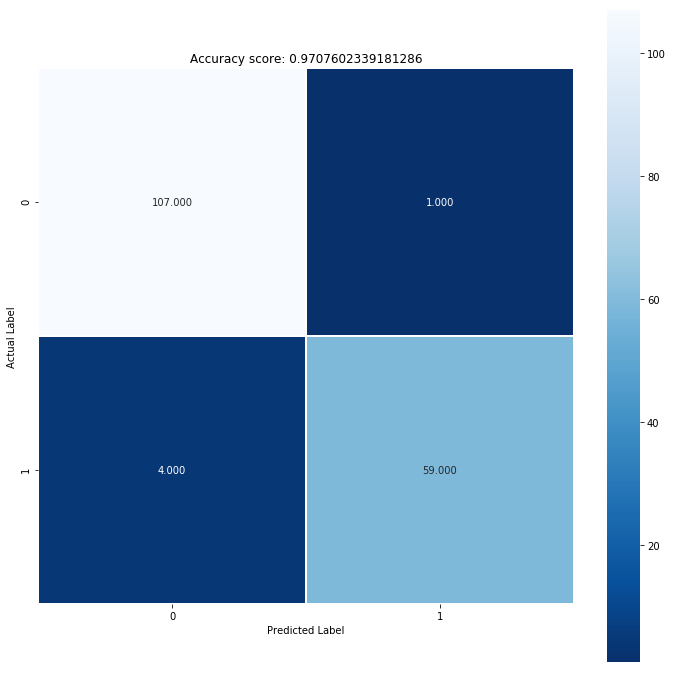

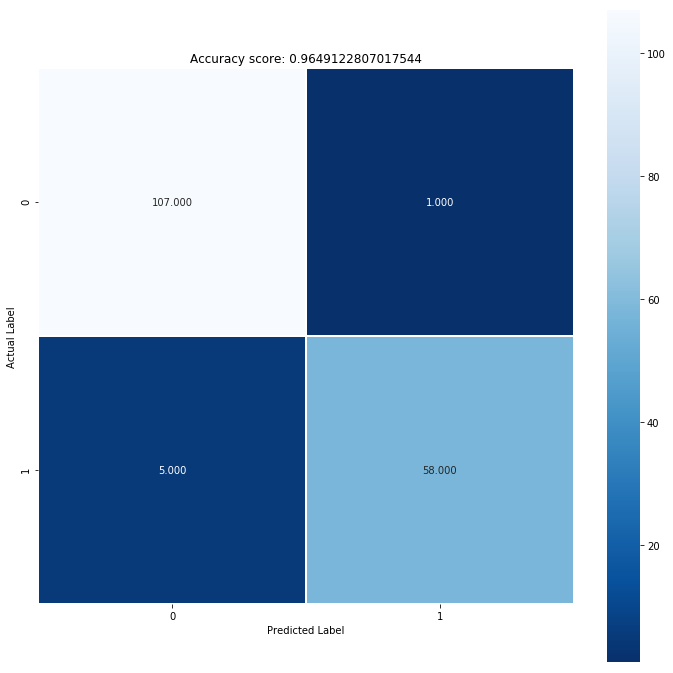

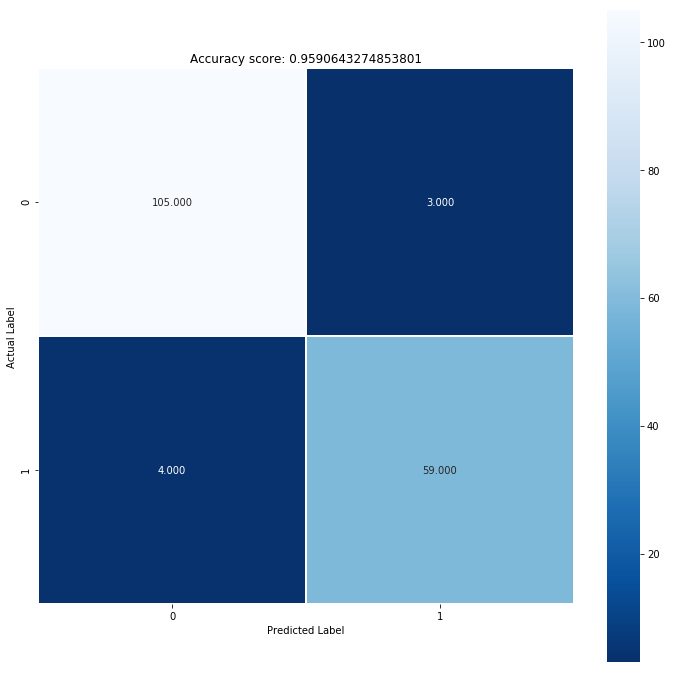

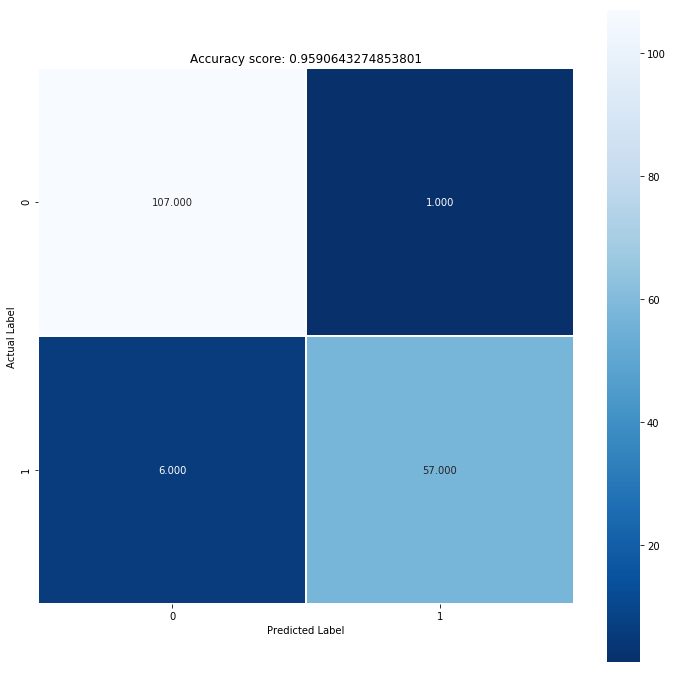

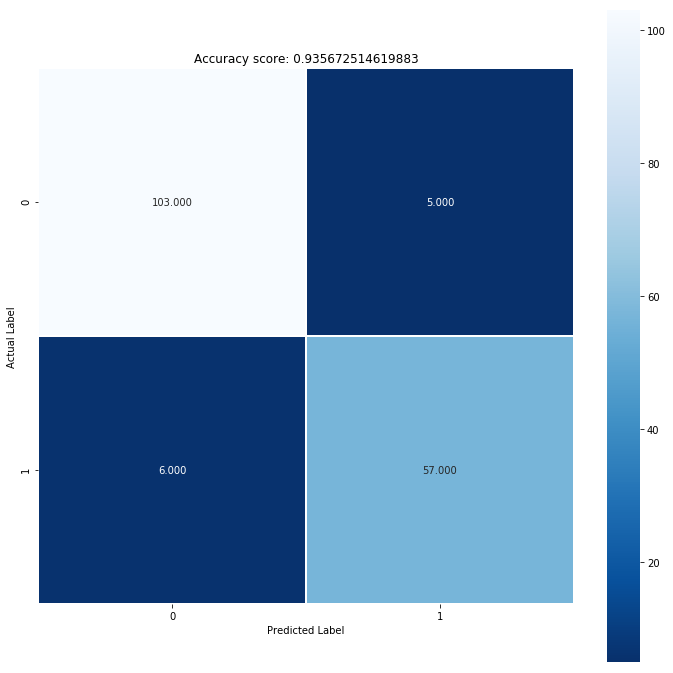

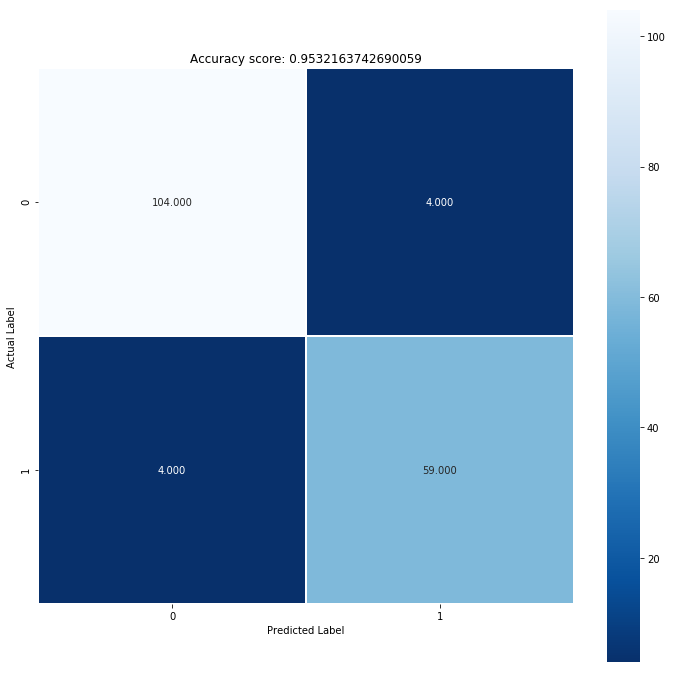

In [48]:
PrintModelResults(X_train, y_train, X_test, y_test)

### Tree-Based Selection Feature

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_fs, y_fs)
clf.feature_importances_

array([0.14889269, 0.08036348, 0.30218333, 0.08909486, 0.03731506,
       0.28733121, 0.05481937])

In [50]:
model = SelectFromModel(clf, prefit=True)
X_fs = model.transform(X_fs)

In [51]:
X_fs.shape

(569, 3)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y_fs, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 3), (171, 3), (398,), (171,))

Logistic Regression: 0.9415204678362573
 [[104   4]
 [  6  57]]

Support Vector Classifier: 0.935672514619883
 [[102   6]
 [  5  58]]

Decision Tree Classifier: 0.9122807017543859
 [[102   6]
 [  9  54]]

KNN: 0.9239766081871345
 [[103   5]
 [  8  55]]

Random Forest Classifier: 0.9181286549707602
 [[104   4]
 [ 10  53]]

MLP Classifier: 0.935672514619883
 [[106   2]
 [  9  54]]



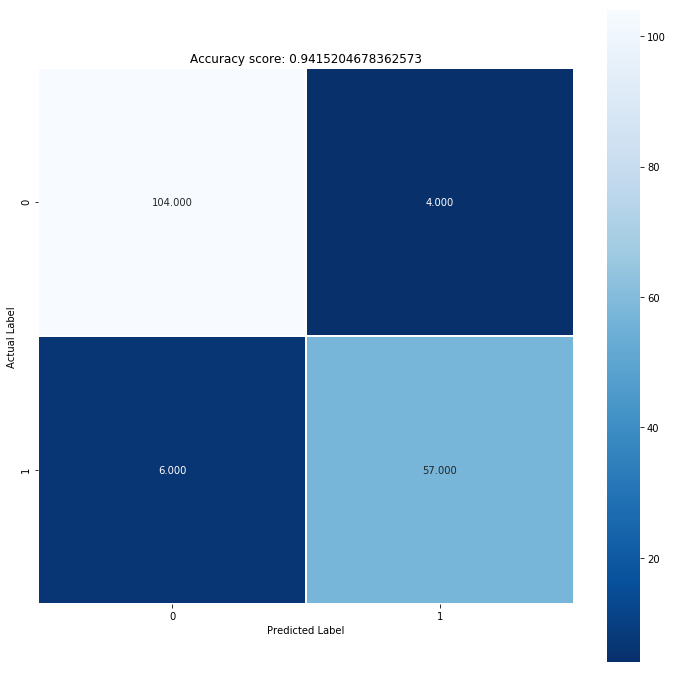

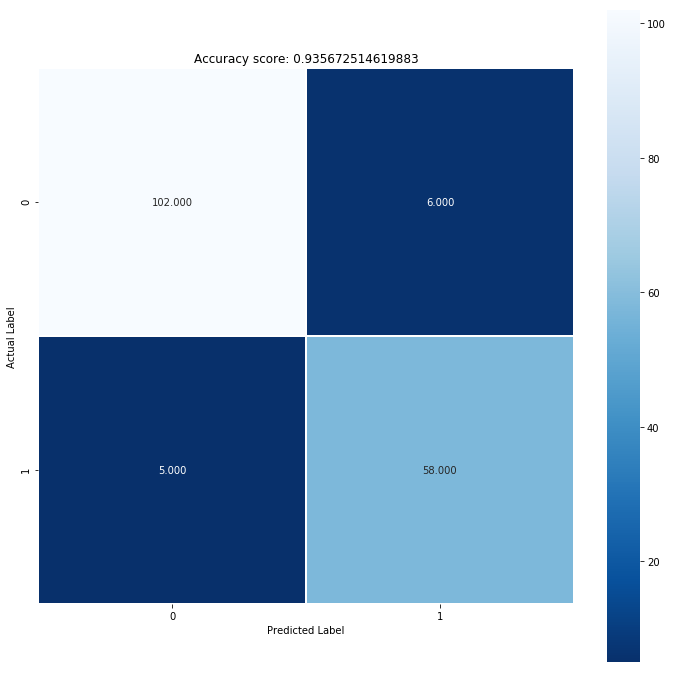

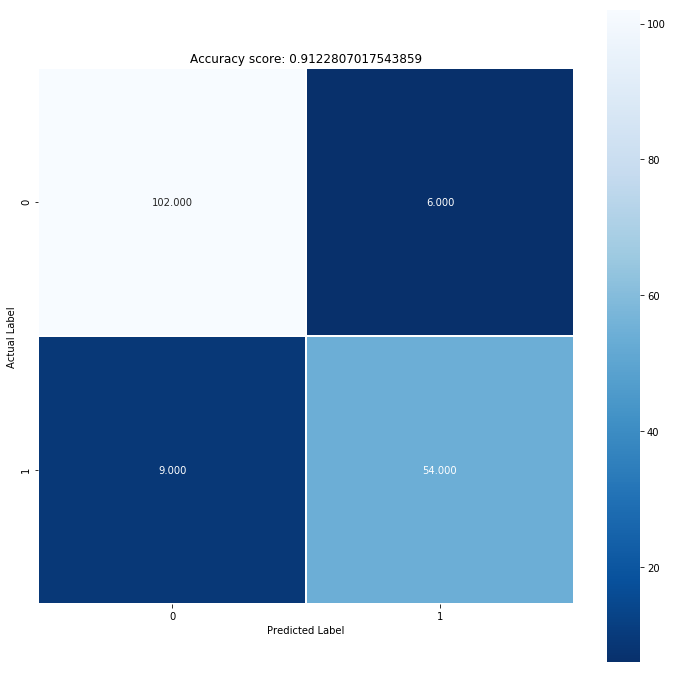

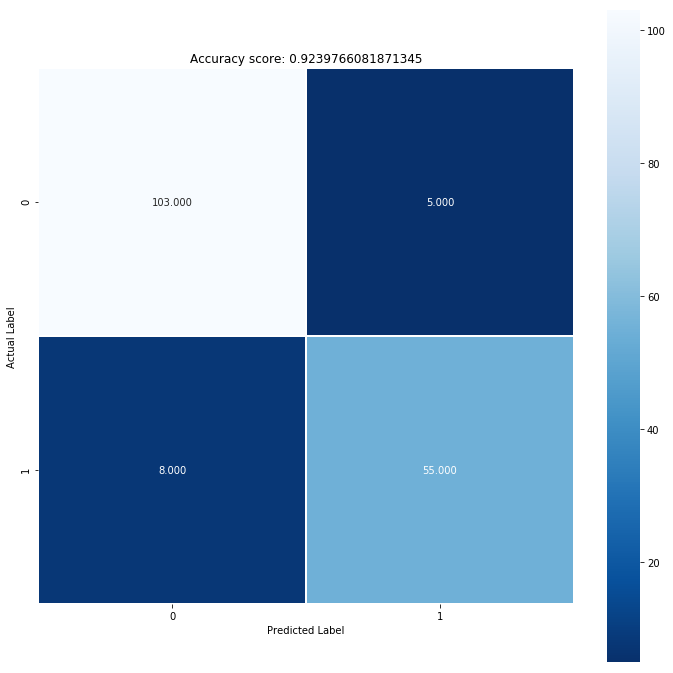

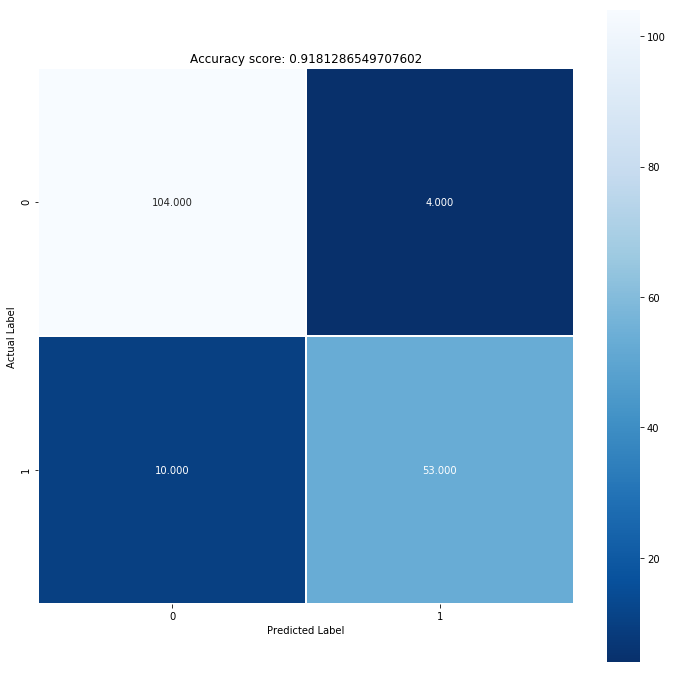

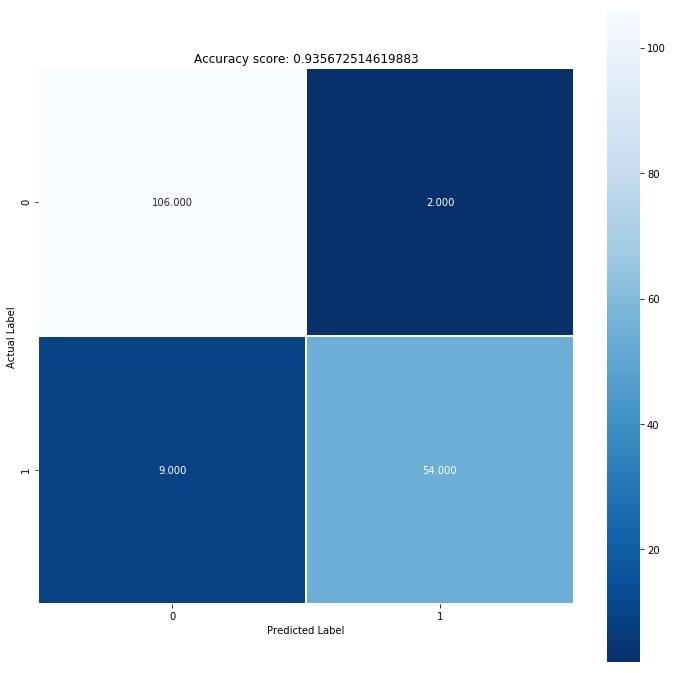

In [53]:
PrintModelResults(X_train, y_train, X_test, y_test)

In [54]:
import pickle

In [57]:
pickle.dump(lr_pickle, open('breast_cancer_prediction.pickle', 'wb'))

### Conclusion

We can see that for all the tests, Logistic Regression Classifier performs betters that all the others with an accuracy of about 97% picking the features manually, 97% using the Linear SVC feature selection tool and about 94% for the tree based selection feature

### References

Wisc. 1996. CPO Dataset Machine Learning Cancer. [ONLINE] Available at: http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/. [Accessed 26 July 2019].
